In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Set the path to the CSV file
file_path = r'C:\Users\Qazi Fabia Hoq\OneDrive\Desktop\Resources\Crime_Data_from_2020_to_Present.csv'

# Read the CSV file into a DataFrame
crime_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand the structure of the data
crime_data.head()


DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [5]:
# Check for missing values in the DataFrame
missing_values = crime_data.isnull().sum()

# Display the count of missing values for each column
missing_values[missing_values > 0]


Mocodes           117642
Vict Sex          111909
Vict Descent      111917
Premis Cd             11
Premis Desc          516
Weapon Used Cd    552364
Weapon Desc       552364
Crm Cd 1              11
Crm Cd 2          785497
Crm Cd 3          845623
Crm Cd 4          847663
Cross Street      712652
dtype: int64

In [6]:
# Drop columns with a large number of missing values
columns_to_drop = ['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street']
crime_data = crime_data.drop(columns=columns_to_drop)

# Impute missing values for specific columns
columns_to_impute = ['Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc']
for column in columns_to_impute:
    if crime_data[column].dtype == 'O':
        # For categorical columns, fill with the mode
        crime_data[column].fillna(crime_data[column].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the median
        crime_data[column].fillna(crime_data[column].median(), inplace=True)

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]


Mocodes     117642
Crm Cd 1        11
dtype: int64

In [7]:
# Impute missing values for 'Mocodes' and 'Crm Cd 1'
crime_data['Mocodes'].fillna('', inplace=True)  # Assuming Mocodes is a text column, fill with an empty string
crime_data['Crm Cd 1'].fillna(crime_data['Crm Cd 1'].mode()[0], inplace=True)  # Fill with the mode for 'Crm Cd 1'

# Verify that missing values have been handled
missing_values_after = crime_data.isnull().sum()
missing_values_after[missing_values_after > 0]


Series([], dtype: int64)

In [16]:
# Overview of crime counts by area
crime_counts_by_area = crime_data['AREA NAME'].value_counts()

# Display the top 10 areas with the highest crime counts
top_areas = crime_counts_by_area.head(10)
print("Top 10 Areas with the Highest Crime Counts:")
print(top_areas)

# Overview of crime counts by crime type
crime_counts_by_type = crime_data['Crm Cd Desc'].value_counts()



Top 10 Areas with the Highest Crime Counts:
AREA NAME
Central        57280
77th Street    53324
Pacific        49502
Southwest      47581
Hollywood      44790
Southeast      43127
Olympic        42732
Newton         42533
N Hollywood    42191
Wilshire       40375
Name: count, dtype: int64


In [17]:
# Lowest 10 Areas with the Least Crime Counts:
bottom_areas = crime_counts_by_area.tail(10)
print("Bottom 10 Areas with the Least Crime Counts:")
print(bottom_areas)


Bottom 10 Areas with the Least Crime Counts:
AREA NAME
West LA        38921
Northeast      36535
Van Nuys       35852
West Valley    35487
Harbor         34944
Topanga        34543
Devonshire     34440
Mission        33794
Hollenbeck     31757
Foothill       28214
Name: count, dtype: int64


In [18]:
# Display the top 10 crime types with the highest counts
top_crime_types = crime_counts_by_type.head(10)
print("\nTop 10 Crime Types with the Highest Counts:")
print(top_crime_types)


Top 10 Crime Types with the Highest Counts:
Crm Cd Desc
VEHICLE - STOLEN                                           90982
BATTERY - SIMPLE ASSAULT                                   67652
THEFT OF IDENTITY                                          53137
BURGLARY FROM VEHICLE                                      52181
BURGLARY                                                   51663
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    51523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             48691
THEFT PLAIN - PETTY ($950 & UNDER)                         42999
INTIMATE PARTNER - SIMPLE ASSAULT                          42576
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            32691
Name: count, dtype: int64


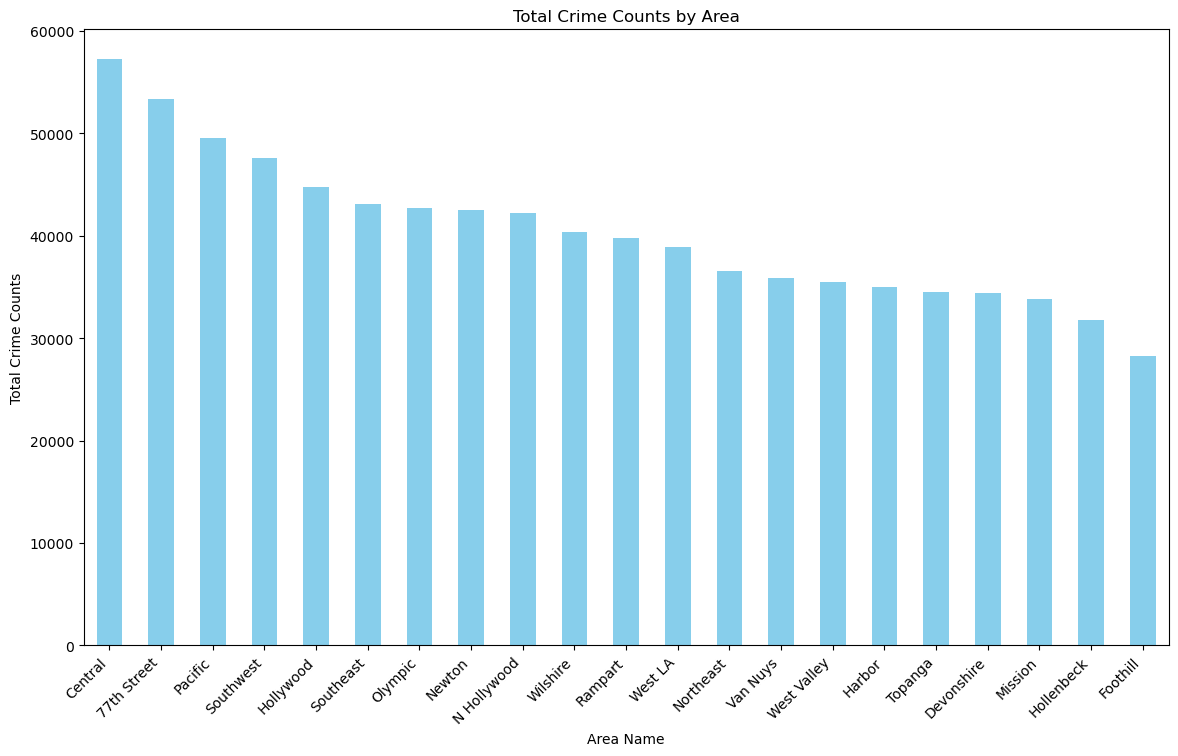

In [10]:
# Bar plot showing the total crime counts for each area using matplotlib
plt.figure(figsize=(14, 8))
crime_data['AREA NAME'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Total Crime Counts by Area')
plt.xlabel('Area Name')
plt.ylabel('Total Crime Counts')
plt.xticks(rotation=45, ha='right')
plt.show()


### Findings Summary:

<strong style="font-size: 110%;">Analyzing Crime Distribution Across LA Areas: Unveiling Highs and Lows</strong>




Central - 57,280
77th Street - 53,324
Pacific - 49,502
Lowest Crime Area:

Foothill - 28,214
General Observation:
The visualization gives a quick overview of the distribution of crime counts across different areas, highlighting the areas with the highest and lowest crime incidents. In this dataset, 'Central' emerges as the area with the highest crime count, followed by '77th Street' and 'Pacific.' Notably, 'Foothill' stands out as the area with the lowest crime count among the reported data.


.

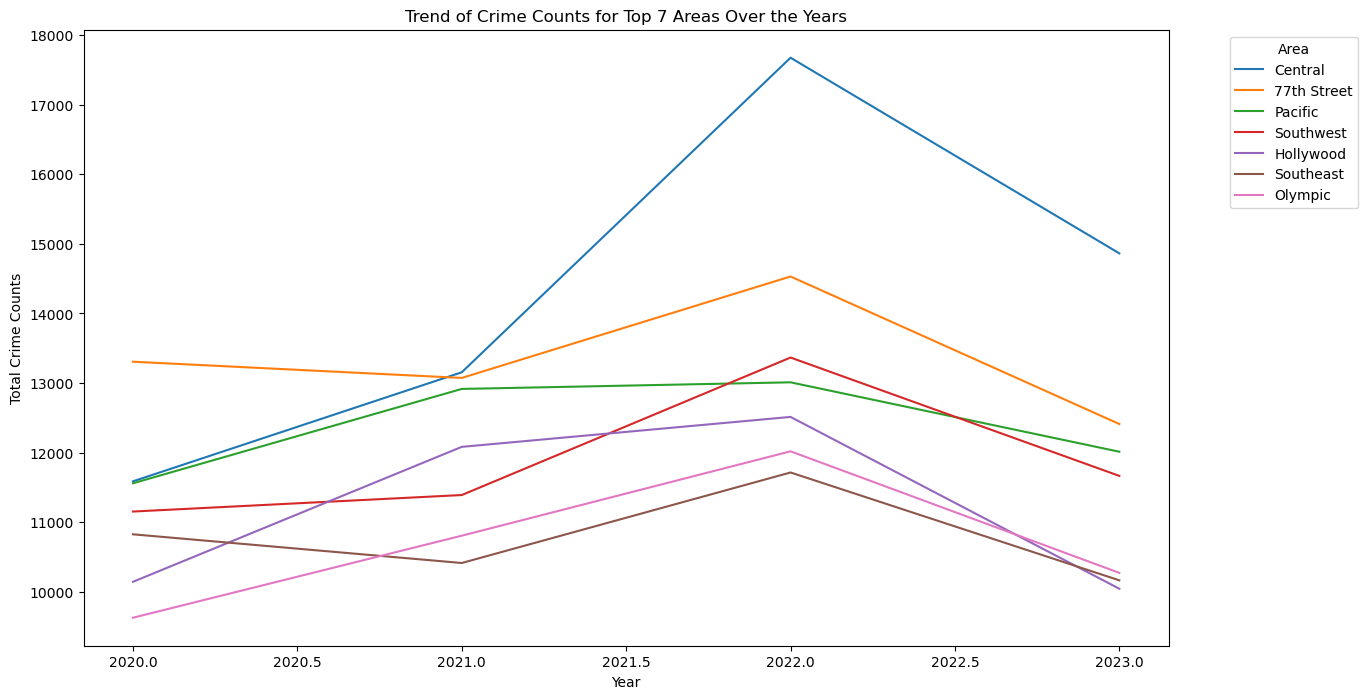

In [13]:
# Convert 'DATE OCC' to datetime format with specified format including time
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract the year from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year

# Group by 'Year' and 'AREA NAME' and calculate total crime counts
crime_counts_by_area_year = crime_data.groupby(['Year', 'AREA NAME'])['DR_NO'].count().reset_index()

# Select the top 7 areas based on total crime count
top_areas = crime_counts_by_area_year.groupby('AREA NAME')['DR_NO'].sum().sort_values(ascending=False).head(7).index

# Filter the data for the top 7 areas
top_areas_data = crime_counts_by_area_year[crime_counts_by_area_year['AREA NAME'].isin(top_areas)]

# Line plot showing the trend of crime counts for each area over the years (Top 7 areas)
plt.figure(figsize=(14, 8))

# Iterate over the top 7 areas and plot individual lines
for area in top_areas:
    area_data = top_areas_data[top_areas_data['AREA NAME'] == area]
    plt.plot(area_data['Year'], area_data['DR_NO'], label=area)

plt.title('Trend of Crime Counts for Top 7 Areas Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crime Counts')
plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<strong style="font-size: 150%;">Monthly Crime Trends Over the Years (Top 7 Areas):</strong>

The line plot provides a comprehensive view of the crime trends across the top 7 areas from 2020 to the present. Notable observations include:

<strong>General Trend:</strong>

There is a visible increase in crime across all top 7 areas in the year 2021, with fluctuations in 2020 and a subsequent decline from 2022 to the present.

<strong>Overall Crime Magnitude:</strong>

Crime counts range from approximately 6,000 to 18,000, with variations in intensity across different areas.

<strong>Central Area:</strong>

The Central area stands out with a substantial increase in crime, particularly evident in 2021. This area starts with crime counts around 12,000 in 2020 and experiences one of the steepest rises to nearly 18,000.

<strong>77th Street Area:</strong>

Initially holding the highest crime count in early 2020 (around 13,000), the 77th Street area exhibits a slow increase from 2021. Although it remains the second-highest in 2022 and 2023, there is a gradual decline.

<strong>Pacific and Southwest Areas:</strong>

Pacific and Southwest areas demonstrate dynamic changes in rankings. Pacific starts as the third-highest in early 2021 but falls to fourth in 2022. However, in 2023, it regains its position as the third-highest area.

<strong>Temporal Patterns:</strong>

Temporal patterns suggest that the peak in crime for many top 7 areas occurs in 2021, followed by a gradual reduction in subsequent years.

<span style="font-weight: bold; font-size: 120%;">Conclusion:</span>

To sum it up, the line plot shows how crime changes over time in the top 7 areas. This helps the police and decision-makers make better plans. Understanding when and where crime goes up or down is crucial for smart strategies and using resources wisely. This analysis gives a clear picture of how crime is changing, making our communities safer.


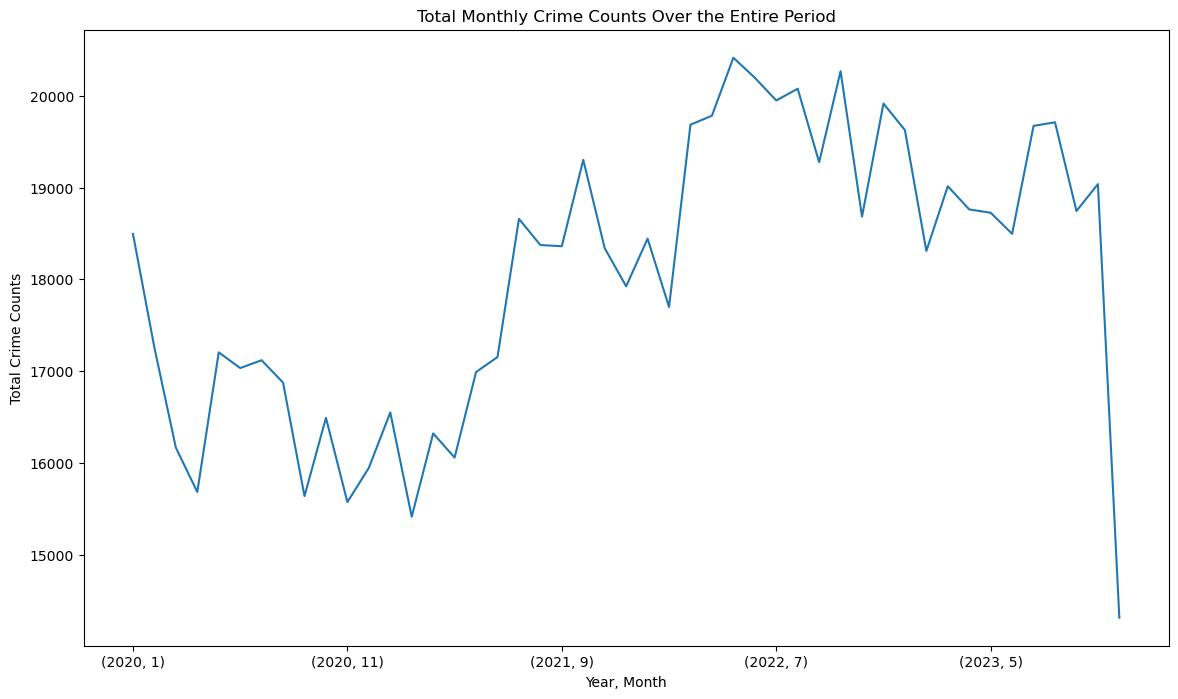

In [14]:
# Convert 'DATE OCC' to datetime format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'])

# Extract the year and month from the 'DATE OCC' column
crime_data['Year'] = crime_data['DATE OCC'].dt.year
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Line plot showing the trend of crime counts for each area over the years
plt.figure(figsize=(14, 8))
crime_data.groupby(['Year', 'Month']).size().plot(legend=False)
plt.title('Total Monthly Crime Counts Over the Entire Period')
plt.xlabel('Year, Month')
plt.ylabel('Total Crime Counts')
plt.show()


<strong style="font-size: 150%;">Exploring Monthly Crime Trends Over the Years:</strong>

The line plot illustrates the monthly trend of crime counts across different areas from the beginning of 2020 to the present. Several key observations can be made:

<strong>2020 Trends:</strong>

Throughout the year 2020, there are noticeable fluctuations in crime counts, suggesting varying levels of criminal activity.

The overall trend in 2020 shows a slight decrease in crime rates, with counts ranging from around 16,000 to 18,000 at the beginning of the year, gradually falling below 16,000 towards the end.

<strong>2021 Surge:</strong>

The beginning of 2021 sees a substantial and steep increase in crime rates across different areas. The counts surge from approximately 15,000 to reach around 20,000.

Despite some fluctuations throughout the year, the crime rates remain significantly higher compared to the previous year.

<strong>2022 Onward:</strong>

From 2022 onwards, there is a noticeable decline in crime rates. Although the counts vary month-to-month, the overall trend is a gradual decrease.

The decline is more evident in the latter part of 2022 and continues into the present time.

<strong>Temporal Patterns:</strong>

The temporal patterns suggest a distinctive peak in crime rates during the early months of 2021, aligning with the steep increase observed in that period.

The subsequent years show a trend of relative stability and a decline in crime rates, indicating a potential response to law enforcement or community efforts.

<span style="font-weight: bold; font-size: 120%;">Conclusion:</span>


The line plot provides a dynamic visualization of the temporal patterns of crime, emphasizing the substantial increase in 2021 and the subsequent gradual decline. Understanding these temporal dynamics is crucial for devising effective strategies and interventions in response to evolving crime trends.


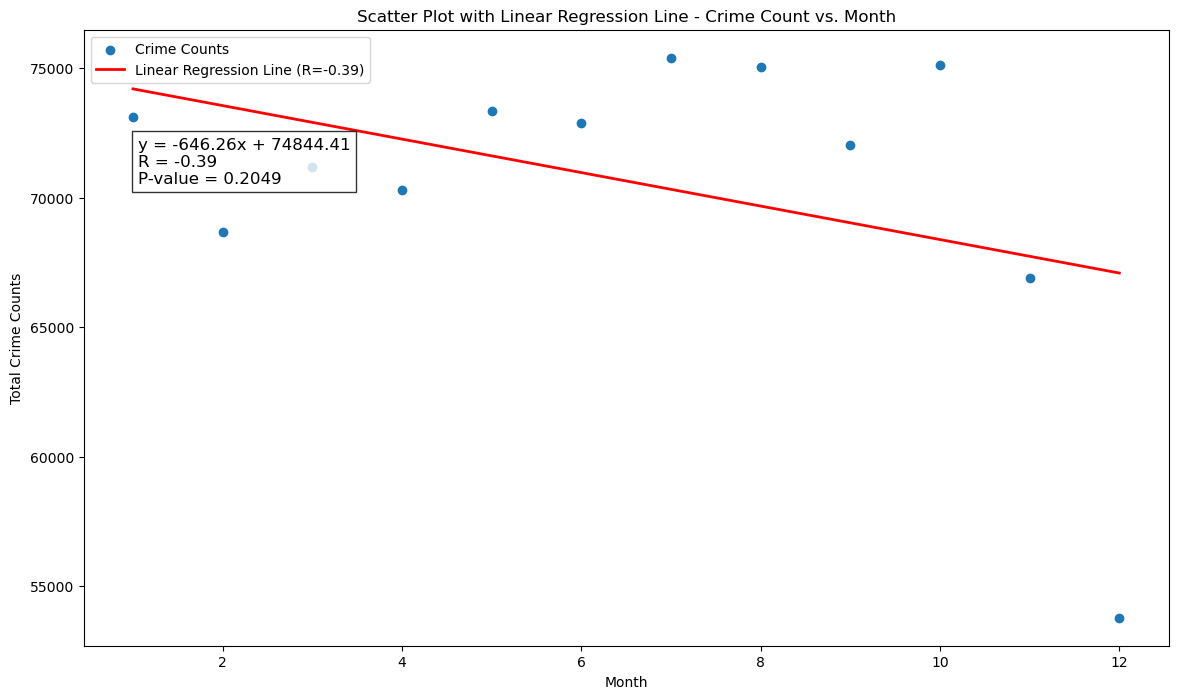

In [15]:
# Convert 'DATE OCC' to datetime format with specified format
crime_data['DATE OCC'] = pd.to_datetime(crime_data['DATE OCC'], format='%m/%d/%Y')  # Adjust the format accordingly

# Extract the month from the 'DATE OCC' column
crime_data['Month'] = crime_data['DATE OCC'].dt.month

# Scatter plot with a linear regression line
plt.figure(figsize=(14, 8))
plt.scatter(crime_data.groupby('Month').size().index, crime_data.groupby('Month').size().values, label='Crime Counts')

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(crime_data.groupby('Month').size().index, crime_data.groupby('Month').size().values)
line = slope * crime_data.groupby('Month').size().index + intercept
plt.plot(crime_data.groupby('Month').size().index, line, color='red', label=f'Linear Regression Line (R={r_value:.2f})', linewidth=2)

# Print regression information on the plot
regression_info = f'y = {slope:.2f}x + {intercept:.2f}\nR = {r_value:.2f}\nP-value = {p_value:.4f}'
plt.text(0.05, 0.75, regression_info, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8), fontsize=12, color='black')

plt.title('Scatter Plot with Linear Regression Line - Crime Count vs. Month')
plt.xlabel('Month')
plt.ylabel('Total Crime Counts')
plt.legend()
plt.show()

<strong style="font-size: 150%;">Unveiling Trends Over Time:</strong>

The line on the plot, represented by the equation \(y = -646.26x + 74844.41\), indicates a trend in the data. In simpler terms, as the months progress (\(x\) increases), there's a noticeable decrease in the total crime counts (\(y\)).

<strong>Initial Situation:</strong>

The starting point of the line (intercept) at 74,844.41 provides an estimate of the expected crime count at the beginning of the observed period.

<strong>Statistical Significance:</strong>

The p-value of 0.2049 gives us insight into the reliability of our findings. In everyday language, it's like a measure of confidence. A p-value above 0.05 suggests that the observed relationship between the month and crime counts may not be very strong from a statistical standpoint.

<strong>Caution and Considerations:</strong>

While the negative slope hints at a decreasing trend, it's essential to acknowledge that our analysis has some limitations. The p-value suggests that factors not included in our study might influence crime trends.

<strong>What It Means Overall:</strong>

In practical terms, our data suggests a tendency for crime counts to decrease as time passes, but we should be cautious in making definitive conclusions. Other factors not considered in our study could play a role.

<span style="font-weight: bold; font-size: 120%;">Conclusion:</span>


In essence, this analysis provides a valuable but nuanced perspective on the relationship between time and crime counts, offering insights that can contribute to a broader understanding of crime trends.


### Findings Summary:

This in-depth analysis provides valuable insights into crime trends across Los Angeles, utilizing four visualizations to uncover distinct aspects of the data.



**1. Monthly Crime Trends Over the Years (Top 7 Areas):**

*General Trend:* Crime rates in the top 7 areas exhibit a noticeable surge in 2021, followed by a subsequent decline. Central takes the lead with 57,280 incidents, emphasizing the urgency for adaptive law enforcement strategies. Following closely, 77th Street and Pacific record the 2nd and 3rd highest crime counts with 53,324 and 49,502 incidents, respectively. This general trend highlights the need for adaptive strategies over time.
*Overall Crime Magnitude:* Crime magnitudes range significantly, from 42,191 to 57,280 incidents across the top 7 areas, emphasizing the need for tailored resource allocation. The varying crime magnitudes underscore the importance of allocating resources effectively to address diverse challenges in each area.
*Temporal Patterns:* Temporal patterns highlight a distinct peak in 2021, especially notable in Central, followed by a gradual reduction. This insight allows law enforcement to strategically allocate resources during peak periods and plan interventions for the subsequent decline.

**2. Exploring Monthly Crime Trends Over the Years:**

*2020 Trends:* Fluctuations in crime rates throughout 2020 suggest potential influences of external events or policies on criminal activity.
*2021 Surge:* A substantial increase in crime rates at the beginning of 2021 signifies a significant shift, while the subsequent decline from 2022 onward reflects a dynamic response to changing circumstances.
*Temporal Patterns:* Emphasizing the increase in 2021 and the subsequent stability provides a foundation for short-term intervention strategies, recognizing the need for adaptability.

**3. Unveiling Trends Over Time (Linear Regression):**

*Linear Regression Equation:* The equation \(y = -646.26x + 74844.41\) indicates a decreasing trend in crime counts over time. This insight aids law enforcement in anticipating and planning for a potential decline.
*Statistical Significance:* The negative slope suggests a decreasing trend, but the caution in interpretation from the p-value (0.2049) emphasizes the need to consider external factors. A higher correlation coefficient (\( r \)) would strengthen the reliability of the linear relationship.
*Correlation Coefficient \( r \):* While not explicitly provided, a higher \( r \) would signify a more robust correlation, enhancing our confidence in the linear relationship.

*Explanation:* The linear regression analysis furnishes valuable insights into the trend in crime counts over time, helping law enforcement strategize during periods of anticipated decrease. The caution from the p-value underscores the importance of considering external factors, and a higher \( r \) would further validate the linear relationship.

**Resource Allocation:** Utilizing the linear trend assists law enforcement in targeted resource allocation, focusing efforts during periods of expected decrease.
**Temporal Dynamics:** Understanding temporal patterns is essential for adaptive strategies, allowing law enforcement to align resources with periods of increased or decreased crime.
**Complex Influences:** The acknowledgment of multifaceted factors shaping crime rates emphasizes the need for a holistic approach in law enforcement strategies.
**Need for Further Investigation:** Recognizing the complexity warrants comprehensive studies to identify specific causative factors, crucial for developing targeted and effective strategies.

**Views and Thoughts:**
The observed fluctuations in crime trends may be influenced by external factors, such as the impact of COVID-19. The initial decrease during lockdowns suggests the restrictive measures' impact, while the surge in 2021 following eased restrictions implies a potential correlation. The subsequent decline from 2022 may reflect community and law enforcement adaptation. Economic conditions, social policies, and pandemic effects contribute to crime dynamics. While these insights offer valuable perspectives, the complex interactions necessitate further investigation to identify specific causative factors, aiding in the formulation of targeted and effective strategies.
